# **What is Pivot Table in Python?**

In Python, you can create pivot tables using libraries like pandas or NumPy, which are commonly used for data manipulation and analysis. 


Now, let's create a simple pivot table:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
# Sample data
data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
    'Product': ['A', 'B', 'A', 'B'],
    'Sales': [100, 200, 150, 250],
}

In [13]:
# Create a pandas DataFrame
df = pd.DataFrame(data)

In [14]:
# Create a pivot table
pivot_table = pd.pivot_table(df, values='Sales', index='Date', columns='Product', aggfunc='sum')

In [15]:
print(pivot_table)

Product       A    B
Date                
2023-01-01  100  200
2023-01-02  150  250


In this example, we first create a DataFrame using sample data. Then, we use the `pd.pivot_table` function to create a pivot table. Here's what each argument does:

- `df`: The DataFrame containing the data.
- `values`: The column for which you want to aggregate values (in this case, 'Sales').
- `index`: The column that you want to use as the rows in the pivot table (in this case, 'Date').
- `columns`: The column that you want to use as the columns in the pivot table (in this case, 'Product').
- `aggfunc`: The aggregation function to apply when there are multiple values that need to be combined. You can use functions like 'sum', 'mean', 'max', etc., depending on your requirements.

## **Real-world Examples**

In [3]:
df = sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.pivot_table(index='sex',columns='smoker',values='total_bill')

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [6]:
## aggfunc# aggfunc
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')


smoker,Yes,No
sex,,
Male,9.911845,8.726566
Female,9.189751,7.286455


In [7]:
# all cols together
df.pivot_table(index='sex',columns='smoker')['size']

<ipython-input-7-dd5735ad60ca>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index='sex',columns='smoker')['size']


smoker,Yes,No
sex,,
Male,2.500000,2.711340
Female,2.242424,2.592593


In [8]:
# multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'})

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [9]:
# margins
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


### **Plotting graph**

In [3]:
df = pd.read_csv('Data\Day43\expense_data.csv')

In [4]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [5]:
df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['month'] = df['Date'].dt.month_name()

In [9]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


<Axes: xlabel='month'>

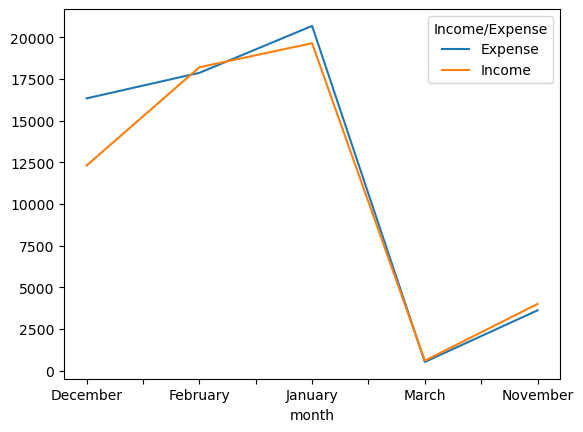

In [10]:
df.pivot_table(index='month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

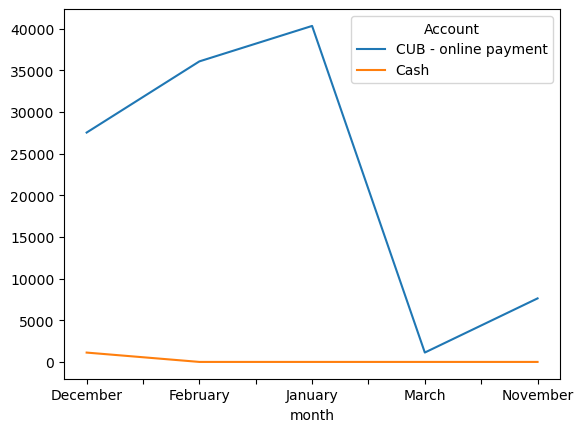

In [11]:
df.pivot_table(index='month',columns='Account',values='INR',aggfunc='sum',fill_value=0).plot()